<a href="https://colab.research.google.com/github/kikiooooo/100dataset/blob/main/stock0_newnew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
import statsmodels.tools.eval_measures

import io
from google.colab import files

In [98]:
data = pd.read_csv('train.csv')

In [99]:
data

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1.0,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0.0,0_0_0
1,1,0,0,166603.91,-1.0,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.000000,-5.519986,0.0,0_0_1
2,2,0,0,302879.87,-1.0,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.000000,-8.389950,0.0,0_0_2
3,3,0,0,11917682.27,-1.0,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.000000,-4.010200,0.0,0_0_3
4,4,0,0,447549.96,-1.0,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.000000,-7.349849,0.0,0_0_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4881870,90,448,340,3140051.88,-1.0,0.997635,6095549.10,0.927509,0.969382,0.997346,11151.27,0.997853,17217.50,0.997545,-1.580119,24674.0,448_340_90
4881871,91,448,340,0.00,0.0,1.000887,10161980.81,1.000887,1.000887,1.000488,15932.42,1.000887,12067.20,1.000715,2.950430,24674.0,448_340_91
4881872,92,448,340,711974.83,-1.0,0.996847,2936861.84,0.965235,0.993751,0.996629,10672.35,0.998267,822.30,0.998150,-12.829900,24674.0,448_340_92
4881873,93,448,340,468160.23,1.0,0.993757,6669386.55,1.005912,1.000882,0.993338,1824.90,0.993757,2394.71,0.993519,18.490553,24674.0,448_340_93


<ipython-input-60-dcf28e07494a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

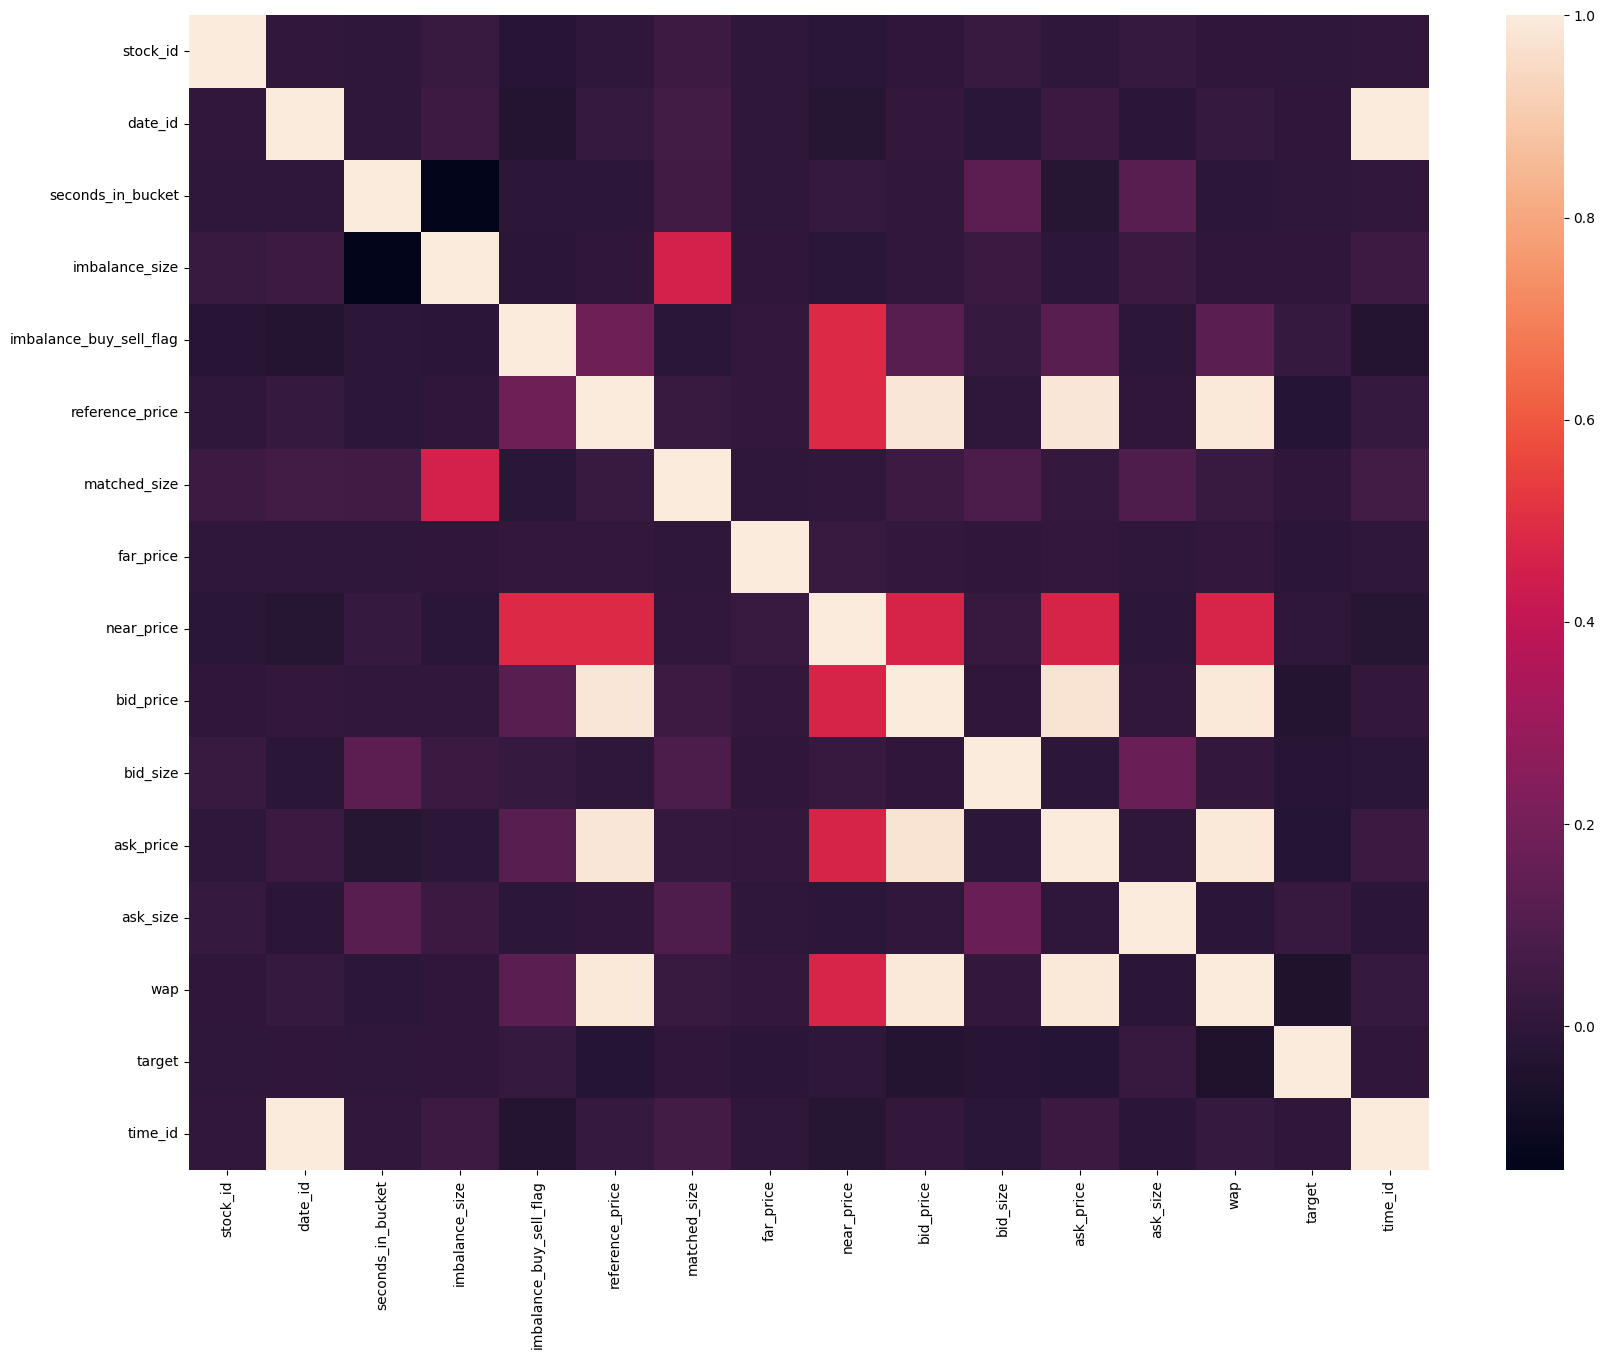

In [60]:
plt.subplots(figsize = (20,15))
sns.heatmap(data.corr())

In [79]:
stock_0 = data[data['stock_id']==0]
stock_0

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0.0,0_0_0
191,0,0,10,1299772.70,1,1.000026,15261106.63,NaN,NaN,0.999812,13996.50,1.000026,23519.16,0.999892,0.389814,1.0,0_10_0
382,0,0,20,1299772.70,1,0.999919,15261106.63,NaN,NaN,0.999812,4665.50,0.999919,12131.60,0.999842,4.220009,2.0,0_20_0
573,0,0,30,1299772.70,1,1.000133,15261106.63,NaN,NaN,1.000026,55998.00,1.000133,46203.30,1.000085,5.450249,3.0,0_30_0
764,0,0,40,1218204.43,1,1.000455,15342674.90,NaN,NaN,1.000241,14655.95,1.000455,26610.45,1.000317,3.169775,4.0,0_40_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216010,0,113,400,376924.33,-1,1.001254,22834182.84,0.993475,1.000402,1.001254,46129.45,1.001361,93.96,1.001361,1.039505,6255.0,113_400_0
1216207,0,113,410,376924.33,-1,1.001148,22834182.84,0.993475,1.000295,1.001148,19445.58,1.001361,28188.00,1.001235,0.079870,6256.0,113_410_0
1216404,0,113,420,376924.33,-1,1.001148,22834182.84,0.993475,1.000295,1.001148,26772.90,1.001254,37673.95,1.001192,3.980398,6257.0,113_420_0
1216601,0,113,430,348774.64,-1,1.000508,22862332.53,0.994860,0.999656,1.000508,1877.60,1.000722,49391.40,1.000516,7.200241,6258.0,113_430_0


In [80]:
stock_0.shape

(6260, 17)

In [81]:
stock_0.columns

Index(['stock_id', 'date_id', 'seconds_in_bucket', 'imbalance_size',
       'imbalance_buy_sell_flag', 'reference_price', 'matched_size',
       'far_price', 'near_price', 'bid_price', 'bid_size', 'ask_price',
       'ask_size', 'wap', 'target', 'time_id', 'row_id'],
      dtype='object')

In [82]:
imbalance = stock_0['imbalance_size']*stock_0['imbalance_buy_sell_flag']

In [83]:
X = {'wap': stock_0['wap'],
    'imbalance': imbalance}
X = pd.DataFrame(X)

In [84]:
Y = stock_0['target']

In [85]:
validation_size = 0.2
train_size = int(len(X) * (1-validation_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

In [86]:
X_train = pd.DataFrame(X_train)

In [87]:
Y_train = pd.DataFrame(Y_train)

In [89]:
X_train = X_train.to_numpy().reshape(X_train.shape[0], 2)
Y_train = Y_train.to_numpy().reshape(-1,1)

In [91]:
n_time_steps =
n_features = 2
X_train = X_train.reshape(-1, n_time_steps, n_features)
X_train.shape

(1, 5008, 2)

In [92]:
Y_train.shape

(5008, 1)

In [93]:
X_train.shape[0]

1

In [94]:
X_train.shape[1]

5008

In [95]:
def create_LSTM_model(neurons=32, learn_rate=0.01, momentum=0):
    # Create the model
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))

    # Use the optimizer of Adam to avoid Vanishing Gradient Problem
    # optimizer = SGD(lr=learn_rate, momentum=momentum)
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='mse', optimizer=optimizer)
    return model


In [96]:
LSTMModel = create_LSTM_model(32, learn_rate = 0.01, momentum=0)
LSTMModel_fit = LSTMModel.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=330, batch_size=72, verbose=0, shuffle=False)


ValueError: ignored